## Contextualized Topic Model

### Import data

In [3]:
import os
import json

dirpath = os.getcwd() + '\\preprocessing\\'

with open(dirpath+'swl_optimum.txt', 'r', encoding='utf-8') as f:
    swl = f.read().split('\n')
    swl += ['все', 'еще', 'год', 'есть', 'быть', 'мочь']

with open(dirpath+'tokens.json', 'r') as f:
    docs = json.load(f)
    docs_clean = [[word for word in doc if word not in swl and len(word) > 2] 
                  for doc in docs]
    texts = [' '.join(doc) for doc in docs_clean]

### Create a dataset to train the model

In [5]:
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

sp = WhiteSpacePreprocessingStopwords(texts, 'russian')
preprocessed_documents, unpreprocessed_documents, vocab = sp.preprocess()

C:\Users\satan\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
bert_model = 'distiluse-base-multilingual-cased-v1'

In [7]:
# Initialize a contextualized model
qt = TopicModelDataPreparation(bert_model)

# Create the training set
training_dataset = qt.fit(text_for_contextual=unpreprocessed_documents, \
                          text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

### Train and run the ZeroShot topic model

In [8]:
from contextualized_topic_models.models.ctm import ZeroShotTM

# Train the model
num_topics = 10
ctm_zero = ZeroShotTM(bow_size=len(qt.vocab), contextual_size=512, \
                      n_components=num_topics, num_epochs=50)

# Run the model
ctm_zero.fit(training_dataset)

Epoch: [50/50]	 Seen Samples: [63000/63000]	Train Loss: 4080.8893601190475	Time: 0:00:36.222802: : 50it [30:36, 36.73s/it]
Sampling: [20/20]: : 20it [11:53, 35.69s/it]


### Compute coherence score 

In [ ]:
from contextualized_topic_models.evaluation.measures import CoherenceNPMI

npmi = CoherenceNPMI(texts=docs, topics=ctm_zero.get_topic_lists(10))
npmi.score()

### Print the results

In [12]:
ctm_zero.get_topics(15)

defaultdict(list,
            {0: ['формироваться',
              'вестись',
              'окончание',
              'глубинныи',
              'мощныи',
              'восстановление',
              'пик',
              'геологическии',
              'шаг',
              'глава',
              'мысль',
              'исходить',
              'подвергаться',
              'двигатель',
              'испытание'],
             1: ['передаваться',
              'предпочитать',
              'восстановление',
              'выясниться',
              'поведенческии',
              'успешно',
              'механическии',
              'корм',
              'чувствовать',
              'коррелировать',
              'предмет',
              'подтвердиться',
              'неожиданныи',
              'защита',
              'выраженныи'],
             2: ['животное',
              'ген',
              'hox',
              'общии',
              'предок',
              'эволюционныи',
      

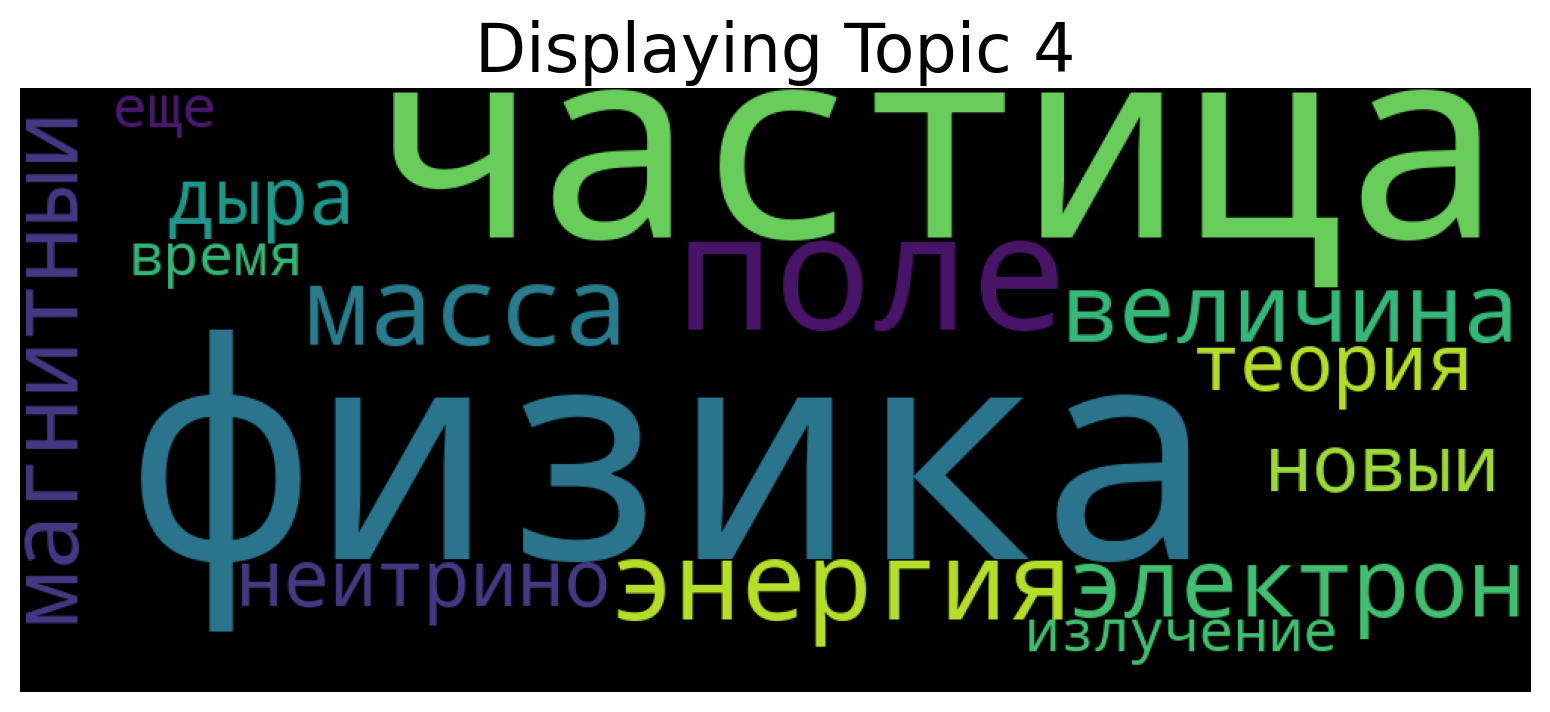

In [13]:
ctm_zero.get_wordcloud(topic_id=4, n_words=15)

### Train and run the Combined topic model

In [14]:
from contextualized_topic_models.models.ctm import CombinedTM

# Train the model
num_topics = 10
ctm_comb = CombinedTM(bow_size=len(qt.vocab), contextual_size=512, \
                      n_components=num_topics, num_epochs=50)

# Run the model
ctm_comb.fit(training_dataset)

Epoch: [50/50]	 Seen Samples: [63000/63000]	Train Loss: 4009.326202876984	Time: 0:00:35.534839: : 50it [32:28, 38.98s/it]  
Sampling: [20/20]: : 20it [12:11, 36.57s/it] 


### Print the results

In [15]:
ctm_comb.get_topics(15)

defaultdict(list,
            {0: ['австралиискии',
              'хватать',
              'общепринятыи',
              'недостаточно',
              'достоверно',
              'видовои',
              'десять',
              'поддерживать',
              'подтверждаться',
              'охота',
              'четвертыи',
              'исключить',
              'вначале',
              'беспозвоночныи',
              'наверняка'],
             1: ['мантия',
              'порода',
              'плита',
              'состав',
              'вода',
              'глобальныи',
              'континентальныи',
              'поверхность',
              'земля',
              'осадочныи',
              'кора',
              'включение',
              'углерод',
              'потепление',
              'вымирание'],
             2: ['получение',
              'оксид',
              'применение',
              'раствор',
              'металл',
              'создание',
              'д

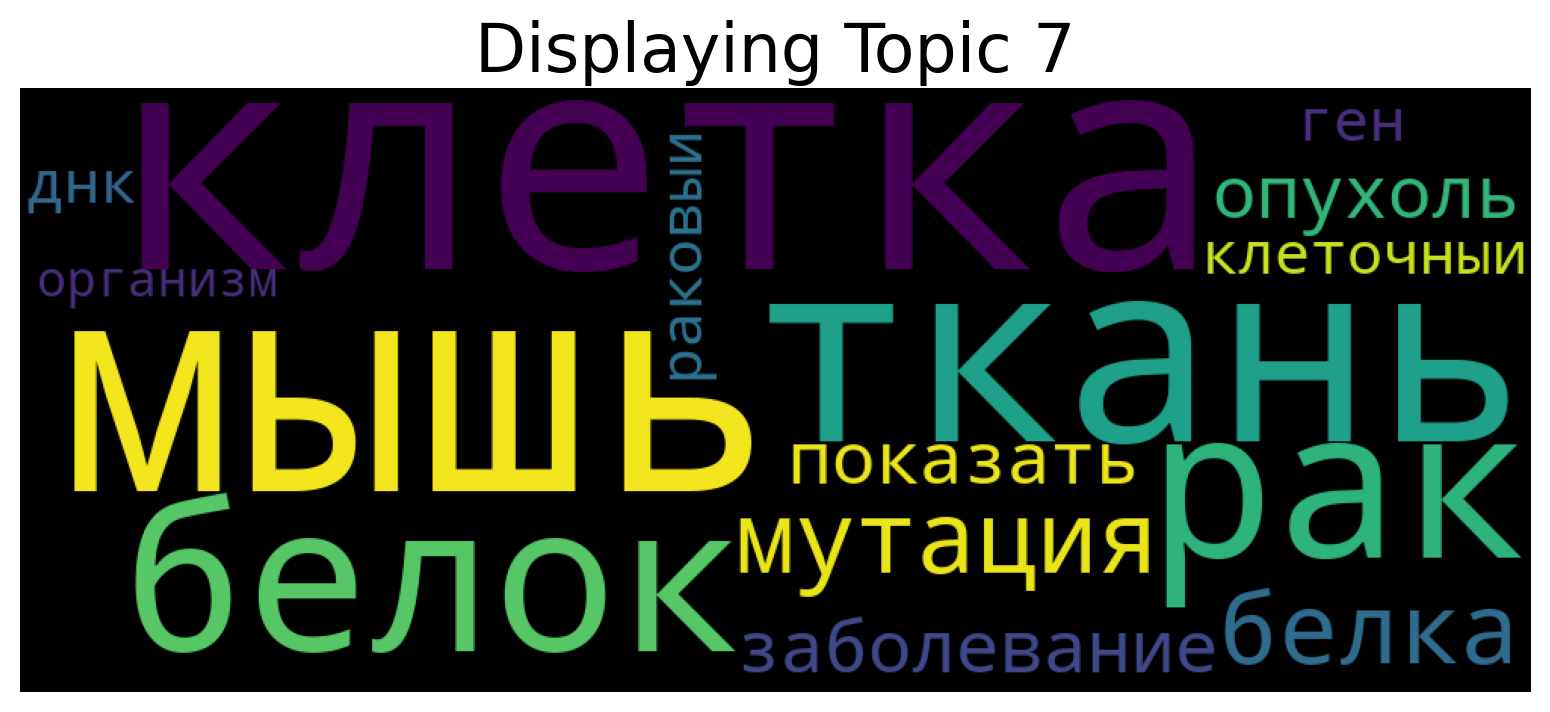

In [17]:
ctm_comb.get_wordcloud(topic_id=7, n_words=15)